In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [14]:
df.dropna(inplace=True)
data = df.reset_index(drop=True)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [15]:
df_scale = data.copy()
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_scale)
len(df_scale)

195

In [16]:
data = pd.DataFrame(df_scale)
data.columns = df.columns
data_cluster = data.copy()
data.head()
data.shape

(195, 14)

**Algoritma K-MEANS**

Text(0, 0.5, 'Inertia')

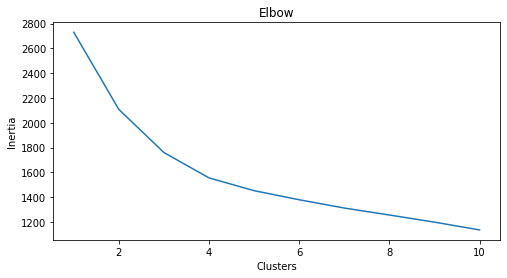

In [17]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [18]:
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans3.fit(data)
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked,cluster_kmeans3
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658,-1.025978,0
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658,0.974679,2
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658,-1.025978,1
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658,0.974679,2
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658,0.974679,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392,-1.080123,-0.807276,2.053103,1.281828,-0.278663,-1.313189,1.982307,-0.095723,-2.027708,-1.025978,1
191,1.042978,-0.055628,-0.733151,-0.330095,0.925820,-0.769808,-0.937289,-0.556512,-0.964551,1.454520,0.136003,0.567357,0.193658,-1.025978,0
192,-0.637128,-1.107943,1.028218,-0.311504,-1.080123,-0.867223,1.974968,-0.556667,-0.288124,0.458295,-1.086013,0.313172,0.193658,-1.025978,0
193,-0.289998,0.349108,1.321780,0.559841,-1.080123,-0.436765,-0.870405,-0.556943,0.430876,-0.301983,-0.376228,-0.321952,2.415023,0.974679,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' KMeans 3 cluster')

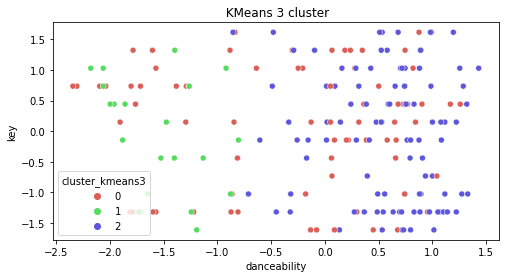

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['danceability'], data_cluster['key'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

**Algoritma K-MEDOIDS**

In [20]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [21]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)
data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked,cluster_kmeans3,Cluster K-Medoids
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658,-1.025978,0,0
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658,0.974679,2,2
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658,-1.025978,1,0
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658,0.974679,2,2
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658,0.974679,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392,-1.080123,-0.807276,2.053103,1.281828,-0.278663,-1.313189,1.982307,-0.095723,-2.027708,-1.025978,1,0
191,1.042978,-0.055628,-0.733151,-0.330095,0.925820,-0.769808,-0.937289,-0.556512,-0.964551,1.454520,0.136003,0.567357,0.193658,-1.025978,0,3
192,-0.637128,-1.107943,1.028218,-0.311504,-1.080123,-0.867223,1.974968,-0.556667,-0.288124,0.458295,-1.086013,0.313172,0.193658,-1.025978,0,0
193,-0.289998,0.349108,1.321780,0.559841,-1.080123,-0.436765,-0.870405,-0.556943,0.430876,-0.301983,-0.376228,-0.321952,2.415023,0.974679,2,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


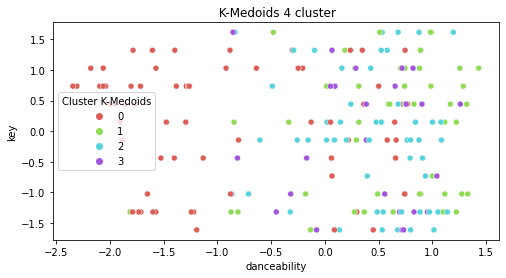

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['danceability'], data_cluster['key'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()

**Hierarchy**

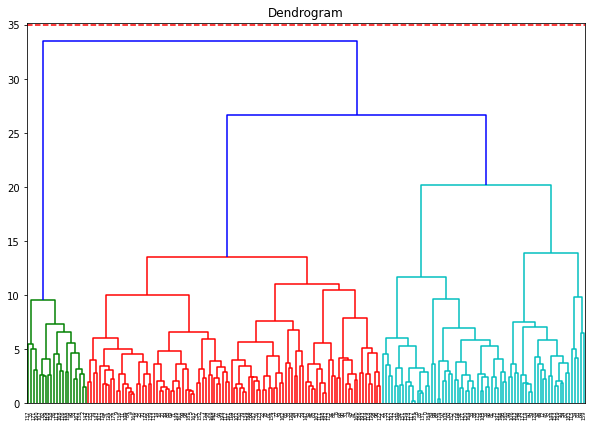

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=35, color='r', linestyle='--')

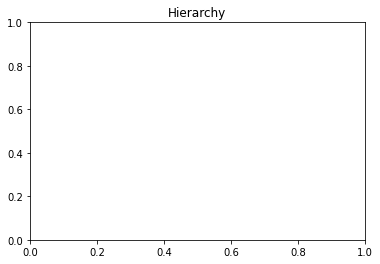

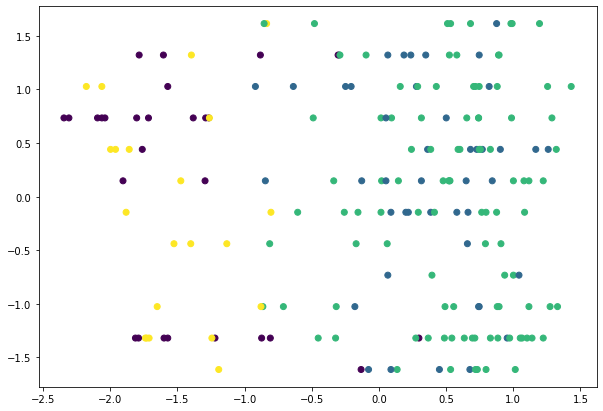

In [24]:
from sklearn.cluster import AgglomerativeClustering

model_agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(data)
plt.title('Hierarchy')
plt.figure(figsize=(10,7))
plt.scatter(data_cluster['danceability'], data_cluster['key'], c=model_agglo.labels_)

**DBSCAN**

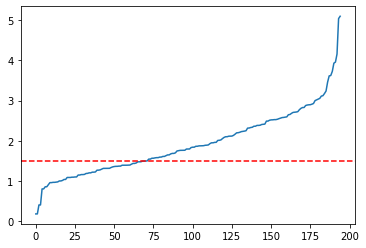

In [25]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')

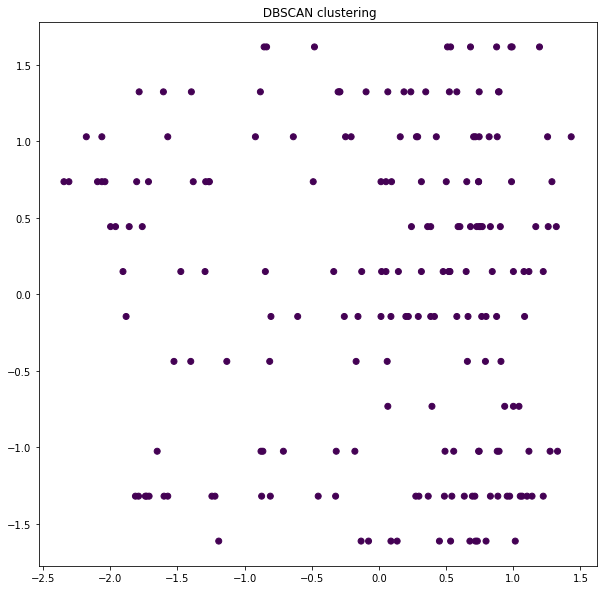

In [26]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1.5, min_samples=13)
model_dbscan.fit(data)
plt.figure(figsize=(10,10))
plt.scatter(data_cluster['danceability'], data_cluster['key'], c=model_dbscan.labels_)
plt.title(' DBSCAN clustering')
plt.show()